# Q1

In [291]:
import numpy as np 
import keras

In [292]:
X = np.loadtxt('FeaturesX.csv')
Y = np.loadtxt('LabelsY.csv')
X.shape
#Y.shape

(7, 800)

In [293]:
from sklearn.model_selection import train_test_split
X = X.transpose()
Y = Y.transpose()
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

#x_train = x_train.transpose()
#x_test = x_test.transpose()
y_train = keras.utils.to_categorical(y_train,4)
y_test = keras.utils.to_categorical(y_test,4)


In [294]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(560, 7) (560, 4)
(240, 7) (240, 4)


In [297]:
# model specifications
Ni=7; Nh=512; No=4;

#parameter and array initialization
Ntrials=3000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])
#accuracya = np.array([])

for trial in range(Ntrials):     

    h=1/(1+np.exp(-wh@x_train.T))        #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h))                #output for all pattern

    do=y*(1-y)*(y_train.T-y)/800         # delta output
    dh=h*(1-h)*(wo.transpose()@do)       # delta backpropagated  
    
    # update weights with momentum
    dwo=0.99*dwo+do@h.T
    wo=wo+0.01*dwo
    dwh=0.99*dwh+dh@x_train
    wh=wh+0.01*dwh
    
    error=np.append(error,np.mean((y_train.T-y)**2))

    if trial % 100 == 0:
        print('iteration: ' + str(trial)  +' error: '  + str(np.mean((y_train.T-y)**2)))

# test
h=1/(1+np.exp(-wh@x_test.T)) #hidden activation for all pattern
y=1/(1+np.exp(-wo@h))        #output for all pattern
y = np.around(y).T


accuracy   = (y_test == y).astype(np.int)
mean_arry  = np.asarray(accuracy).mean()
print('Accuracy on testing: ' + str(mean_arry))



iteration: 0 error: 0.2488083544802736
iteration: 100 error: 0.24440316319270436
iteration: 200 error: 0.2053901182088678
iteration: 300 error: 0.19755026618267624
iteration: 400 error: 0.17543431854025662
iteration: 500 error: 0.056205019956676504
iteration: 600 error: 0.04178348674175295
iteration: 700 error: 0.03511565521699345
iteration: 800 error: 0.03273122877871008
iteration: 900 error: 0.03176639846536267
iteration: 1000 error: 0.03127133775327959
iteration: 1100 error: 0.030921799482715125
iteration: 1200 error: 0.03061410440533971
iteration: 1300 error: 0.030359642989003836
iteration: 1400 error: 0.03013982562041602
iteration: 1500 error: 0.02994167168195994
iteration: 1600 error: 0.02976255555730742
iteration: 1700 error: 0.029598483215325606
iteration: 1800 error: 0.02944759775705496
iteration: 1900 error: 0.029308030636205
iteration: 2000 error: 0.029178307197984157
iteration: 2100 error: 0.02905723339035125
iteration: 2200 error: 0.0289437907300466
iteration: 2300 error: 

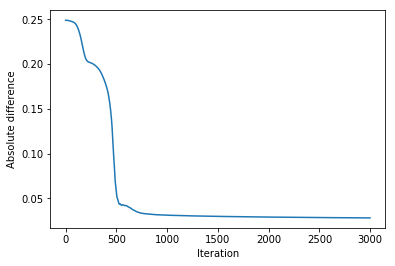

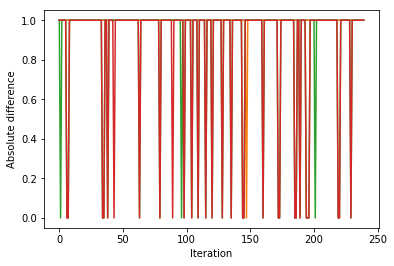

In [298]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()

set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(accuracy)
plt.show()



# Q2

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

In [193]:
train = np.loadtxt('FeaturesX.csv').transpose()
label = np.loadtxt('LabelsY.csv').transpose()
train

array([[0.71075179, 0.92844864, 0.4224715 , ..., 0.48920338, 0.30902575,
        0.74679633],
       [0.38286973, 0.13605081, 0.29719162, ..., 0.15035476, 0.83337014,
        0.70731082],
       [0.47006634, 0.73259825, 0.19005483, ..., 0.01871761, 0.30031994,
        0.08058685],
       ...,
       [0.24237432, 0.18459928, 0.45395852, ..., 0.42657778, 0.0134918 ,
        0.44233444],
       [0.75860067, 0.56909061, 0.73852706, ..., 0.4015656 , 0.31964764,
        0.44494592],
       [0.0878626 , 0.15908099, 0.85252917, ..., 0.73509696, 0.46143694,
        0.0194684 ]])

In [194]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train, label, test_size=0.3, random_state=0)
print(y_train[0:20])

[3. 3. 2. 3. 1. 1. 1. 1. 3. 3. 3. 1. 2. 1. 3. 1. 2. 2. 2. 1.]


In [195]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.optimizers import RMSprop

In [196]:
y_train = keras.utils.to_categorical(y_train,4)
y_test = keras.utils.to_categorical(y_test,4)

In [197]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(7,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 268,804
Trainable params: 268,804
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [199]:
model.fit(x_train,y_train,batch_size=64,epochs=5,verbose=1,
         validation_data=(x_test,y_test))

Train on 560 samples, validate on 240 samples
Epoch 1/5
560/560 [==============================] - 0s 497us/step - loss: 0.9940 - acc: 0.5607 - val_loss: 0.5964 - val_acc: 0.5917
Epoch 2/5
560/560 [==============================] - 0s 67us/step - loss: 0.5668 - acc: 0.7839 - val_loss: 0.3982 - val_acc: 0.8458
Epoch 3/5
560/560 [==============================] - 0s 71us/step - loss: 0.4524 - acc: 0.8375 - val_loss: 0.3407 - val_acc: 0.8792
Epoch 4/5
560/560 [==============================] - 0s 70us/step - loss: 0.3736 - acc: 0.8607 - val_loss: 0.2809 - val_acc: 0.8875
Epoch 5/5
560/560 [==============================] - 0s 70us/step - loss: 0.3314 - acc: 0.8821 - val_loss: 0.2596 - val_acc: 0.8833


In [200]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy',score[1])

240/240 [==============================] - 0s 35us/step
Test loss: 0.2596109469731649
Test accuracy 0.8833333333333333


# Q3

In [72]:
from random import random
from random import randrange
import numpy as np

In [73]:
die1 = randrange(6)
die2 = randrange(6)
print(die1,die2)

0 1


In [143]:
a = []
for i in range(0,20):
    die1 = randrange(1,6)
    die2 = randrange(1,6)
    value = die1 + die2
    a.append(value)
print('add',a)

add [4, 7, 5, 8, 2, 7, 5, 6, 7, 6, 6, 6, 9, 4, 3, 5, 9, 4, 8, 8]


In [144]:
import matplotlib.pyplot as plt

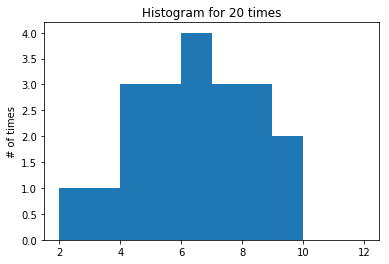

In [167]:
plt.hist(a,range=(2,12))
plt.ylabel('# of times')
plt.title('Histogram for 20 times')
plt.show()

In [147]:
for i in range(2,13):
    count = a.count(i)
    prob = count/20
    print('Probablity for '+ str(i)+' is '+ str(prob)+'.')

Probablity for 2 is 0.05.
Probablity for 3 is 0.05.
Probablity for 4 is 0.15.
Probablity for 5 is 0.15.
Probablity for 6 is 0.2.
Probablity for 7 is 0.15.
Probablity for 8 is 0.15.
Probablity for 9 is 0.1.
Probablity for 10 is 0.0.
Probablity for 11 is 0.0.
Probablity for 12 is 0.0.


In [156]:
b = []
for i in range(0,1000):
    die1 = randrange(1,6)
    die2 = randrange(1,6)
    value = die1 + die2
    b.append(value)


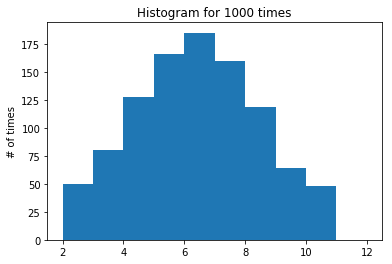

In [169]:
plt.hist(b,range=(2,12))
plt.ylabel('# of times')
plt.title('Histogram for 1000 times')
plt.show()

In [158]:
for i in range(2,13):
    count = b.count(i)
    prob = count/1000
    print('Probablity for '+ str(i)+' is '+ str(prob))

Probablity for 2 is 0.05
Probablity for 3 is 0.08
Probablity for 4 is 0.128
Probablity for 5 is 0.166
Probablity for 6 is 0.185
Probablity for 7 is 0.16
Probablity for 8 is 0.119
Probablity for 9 is 0.064
Probablity for 10 is 0.048
Probablity for 11 is 0.0
Probablity for 12 is 0.0


In [171]:
import random

alter = [1,0,3,4,5,6]
correct = [1,2,3,4,5,6]
print(random.choice(alter))

5


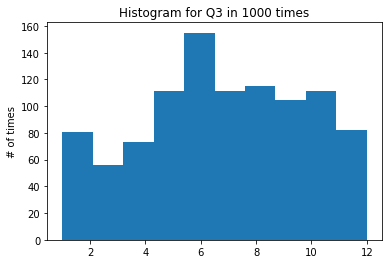

In [180]:
c = []
for i in range(0,1000):
    d1 = random.choice(alter)
    d2 = random.choice(correct)
    val = d1 + d2
    c.append(val)

plt.hist(c)
plt.ylabel('# of times')
plt.title('Histogram for Q3 in 1000 times')
plt.show()

In [193]:
print('Probablity of 7 is '+ str(c.count(7)/1000))


Probablity of 7 is 0.111


In [194]:
print('Probablity of 3 is '+ str(c.count(3)/1000))

Probablity of 3 is 0.056


# Q4

In [1]:
from lea import *

In [65]:
# True is work, false is broken
alternator = event(1-(1/1000))
fanbelt = event(1-(2/100))

In [66]:
fanbelt

False : 0.020000000000000018
True  : 0.98

In [67]:
alternator

False : 0.0010000000000000009
True  : 0.999

In [68]:
battery = joint(fanbelt,alternator).switch({ (True, True) : event(1-(5/1000)),
                                         (True, False) : event(0),
                                         (False, True) : event(0),
                                         (False, False) : event(0)})

In [69]:
flat = battery.switch({True : event(0.9),
                       False: event(0.1)
                      })

In [78]:
gas = event(1)
starter = event(1)
carStart = joint(flat,gas,starter).switch({(True,True,True) : event(0.95),
                                          (True,False,True) : event(0),
                                          (True,True,False) : event(0),
                                          (False,True,True) : event(0),
                                          (True,True,False) : event(0),
                                          (False,True,True) : event(0),
                                          (True,False,True) : event(0),
                                          (False,False,False) : event(0)})

In [79]:
#b
P(~alternator.given(~carStart))

0.005496004507962579

In [80]:
#c
P(~fanbelt.given(~carStart))

0.1099200901592516

In [81]:
#d
P(~fanbelt.given(~carStart & ~alternator))

0.020000000000000018

In [82]:
#e
P((~fanbelt & ~alternator).given(~carStart))

0.00010992009015925166